In [1]:
import medicalDataLoader
from torchvision import transforms
from utils import getTargetSegmentation
import torch
from scipy.ndimage import binary_erosion, binary_closing
import seaborn as sb
import matplotlib.pyplot as plt
root_dir = './Data/'
transform = transforms.Compose([
        transforms.ToTensor()
    ])

mask_transform = transforms.Compose([
    transforms.ToTensor()
])
train_set_full = medicalDataLoader.MedicalImageDataset('train',
                                                      root_dir,
                                                      transform=transform,
                                                      mask_transform=mask_transform,
                                                      augment=True,
                                                      equalize=True)

In [2]:
num_by_classe = torch.Tensor([0,0,0,0])
prop_2 = []
prop_3=[]
prop_1=[]
prop_0=[]
tot=0

for img, mask,wx, path in train_set_full:
    labels = getTargetSegmentation(mask)
    for i in range(4):
        num_by_classe[i]+=(labels==i).sum()
    prop_2.append((labels==2).sum())
    prop_3.append((labels==3).sum())
    prop_1.append((labels==1).sum())
    prop_0.append((labels==0).sum())
    tot+=mask.numel()
prop_1 = torch.Tensor(prop_1)
prop_2 = torch.Tensor(prop_2)
prop_3 = torch.Tensor(prop_3)
prop_0 = torch.Tensor(prop_0)



Classe 0 is present on 0.9717700481414795% of pixels
Classe 1 is present on 0.009821424260735512% of pixels
Classe 2 is present on 0.010279711335897446% of pixels
Classe 3 is present on 0.008128820918500423% of pixels


(array([38., 38., 20., 13.,  6., 10.,  8.,  9.,  5.,  1.,  6.,  3.,  4.,
         2.,  4.,  3.,  1.,  2.,  6.,  0.,  2.,  1.,  1.,  2.,  2.,  2.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.39928487,  0.68084759,  0.96241027,  1.24397302,  1.5255357 ,
         1.80709839,  2.08866119,  2.37022376,  2.65178657,  2.93334913,
         3.21491194,  3.4964745 ,  3.77803731,  4.05959988,  4.34116268,
         4.62272549,  4.90428829,  5.18585062,  5.46741343,  5.74897623,
         6.03053904,  6.31210184,  6.59366417,  6.87522697,  7.15678978,
         7.43835258,  7.71991539,  8.0014782 ,  8.283041  ,  8.564602

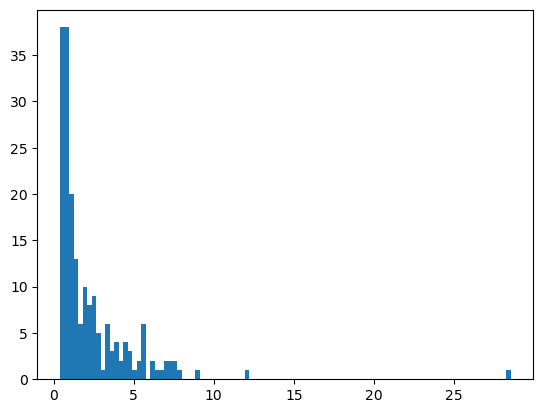

In [63]:
for classe, numel in enumerate(num_by_classe):
    print(f"Classe {classe} is present on {numel/tot}% of pixels")
tens_prop_2 =torch.Tensor(prop_2)
tens_prop_3 = torch.Tensor(prop_3)
prop_relative = tens_prop_2[tens_prop_3!=0]/tens_prop_3[tens_prop_3!=0]
hist , bins = prop_relative.histogram()
plt.hist(prop_relative, bins=100)

In [80]:
final_props=[0,0,0,0]
mask = (prop_3!=0).bitwise_and(prop_2!=0).bitwise_and(prop_1!=0)
sum_all = sum(p[mask].sum() for p in [prop_0, prop_1, prop_2, prop_3])
for i, props in enumerate([prop_0, prop_1, prop_2, prop_3]):
    current_sum = props[mask].sum()
    final_props[i] = current_sum/sum_all

<Axes: ylabel='Count'>

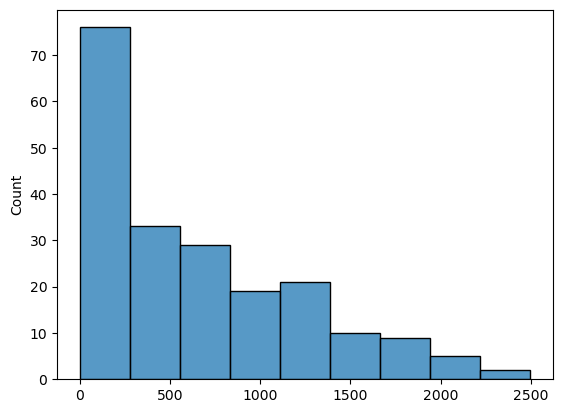

In [18]:
sb.histplot(prop_1)

In [103]:
test_seg = torch.Tensor([[
    [0,0,1,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
]])

In [95]:
def cog(segmentations):
    coord=[]
    for seg in segmentations:
        grid_x, grid_y = torch.meshgrid(torch.arange(seg.shape[1]), torch.arange(seg.shape[0]))

        flat_grid_x = grid_x.flatten().float()
        flat_grid_y = grid_y.flatten().float()
        flat_probabilities = seg.flatten()

        center_x = torch.sum(flat_grid_x * flat_probabilities) / torch.sum(flat_probabilities)
        center_y = torch.sum(flat_grid_y * flat_probabilities) / torch.sum(flat_probabilities)
        coord.append([center_x, center_y])

    return torch.Tensor(coord)

b =cog(test_seg)

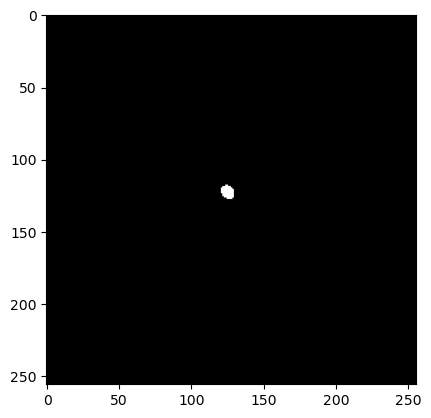

In [119]:
plt.imshow(labels==3, cmap="gray")

In [136]:
c=torch.t_copy(a)

In [137]:
c[0]

tensor([1.])

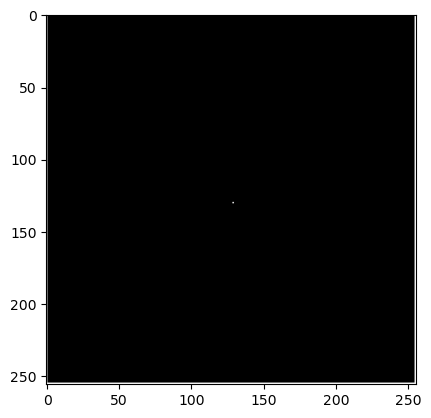

In [161]:
plt.imshow((labels==0)^binary_closing(labels==0), cmap='gray')

In [3]:
from UNet_Base import SegNet
import matplotlib.pyplot as plt

In [4]:
net = SegNet()
net(img[None,:])
print(net(img[None,:]))

tensor([[-1.2238]], grad_fn=<SelectBackward0>)


In [7]:
t=torch.Tensor([[[[0,0,0],[0,0,1],[0,1,1],[1,1,1]],
                [[0,0,0],[0,0,1],[0,1,1],[1,1,1]],
                [[0,0,0],[0,0,1],[0,1,1],[1,1,1]],
                [[0,0,0],[0,0,1],[0,1,1],[1,1,1]]]])

In [13]:
t[:,2]*2

tensor([[[0., 0., 0.],
         [0., 0., 2.],
         [0., 2., 2.],
         [2., 2., 2.]]])

In [2]:
from  medicalDataLoader import RandomZoomCrop

TypeError: RandomZoomCrop.__init__() missing 1 required positional argument: 'size'

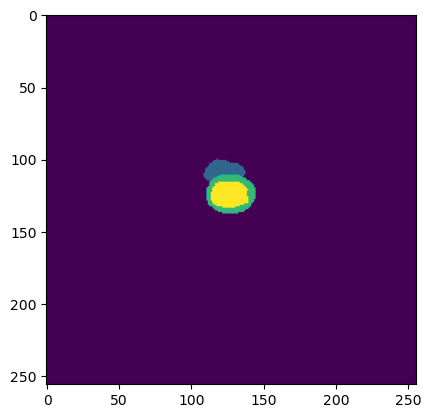

In [52]:
img,mask,path, ed = train_set_full[1]
rzt = RandomZoomCrop(img.shape[1:], scale=(1.01,1.6), offcenter=(-30,30))
plt.imshow(mask[0])

torch.Size([1, 256, 256])

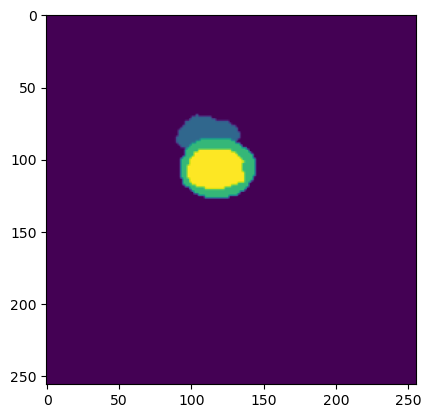

In [70]:
r_img, r_mask = rzt(img, mask)
plt.imshow(r_mask[0])
r_img.shape